In [1]:
from lbg_forecast.likelihood import Likelihood
from lbg_forecast.angular_power import define_cosmo
from lbg_forecast.angular_power import pk
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import lbg_forecast.utils as utils

In [2]:
path = "./"
lhood = Likelihood(path)

Initialising likelihood
Initialisation Complete


In [3]:
norm_diff = pk(define_cosmo(), 1/8, 2.6)/pk(define_cosmo(), 1/8, 0.0)
params = np.array([lhood._cosmo_fid.sigma8*np.sqrt(norm_diff), lhood.b_lbg])
labels = np.array(["$\sigma_{8}$", "$b^{lbg}$"])
F = lhood.fisher_ww(params)

(0.286, 0.288)

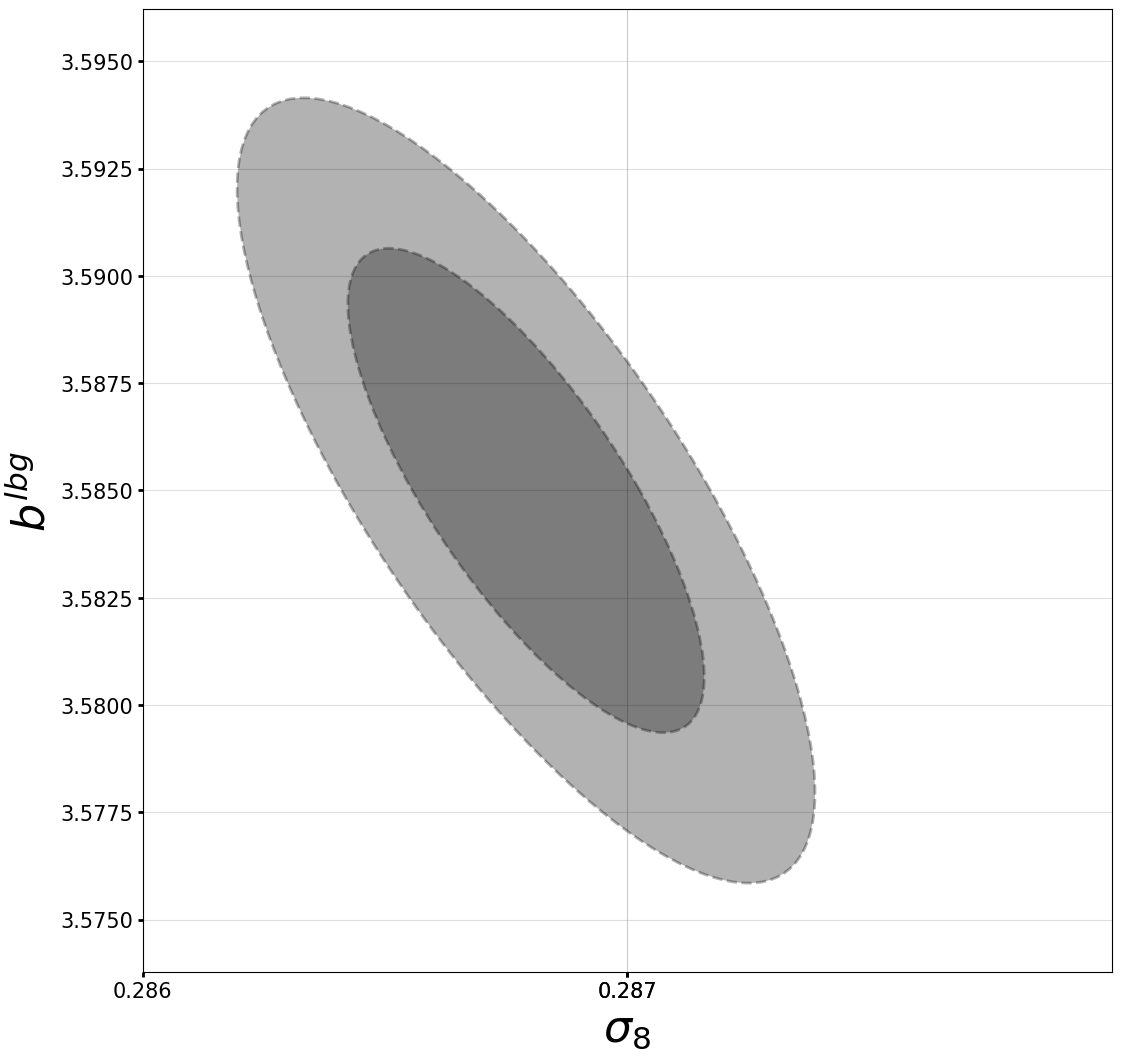

In [4]:
plt.figure(figsize=(25, 25))
nparams = len(params)

#randnos = np.random.multivariate_normal(np.array([params[0], params[1]]),
#                                         np.linalg.inv(F), 1000)
for i in range(nparams):
    for j in range(nparams):
        if j<i:
            plt.subplot(nparams,nparams,i*nparams+j+1)
            plt.subplots_adjust(wspace=0, hspace=0)


            plt.grid(alpha=0.4, zorder=-1)

            utils.plot_contours(F, params, j, i, K=2.279, fill=True,color='k', alpha=0.3, zorder=5, ls="--", lw=2)
            utils.plot_contours(F, params, j, i, K=5.991, fill=True,color='k',  alpha=0.3, zorder=5, ls="--", lw=2)
            #plot_contours(F, params, j, i, K=9.210, fill=True,color='k',  alpha=0.3, zorder=5, ls="--", lw=2)
                #plot_contours(F, params, j, i, K=11.618, fill=True,color='b',  alpha=0.3, zorder=5)

            #plot_contours(F_marg, params, j, i, K=2.279, fill=True,color='r', alpha=0.3, zorder=1, lw=2)
            #plot_contours(F_marg, params, j, i, K=5.991, fill=True,color='r', alpha=0.3, zorder=1, lw=2)
                #plot_contours(F_marg, params, j, i, K=9.210, fill=True,color='r',  alpha=0.3, zorder=1)
                #plot_contours(F_marg, params, j, i, K=11.618, fill=True,color='r', alpha=0.3, zorder=1)
            

            if(j == 0):
                plt.ylabel(labels[i], fontsize = 32)

            if(i == nparams-1):
                plt.xlabel(labels[j], fontsize = 32)

            plt.tick_params(axis="x", width = 2, labelsize=15)
            plt.tick_params(axis="y", width = 2, labelsize=15)

            if(i < len(params) - 1):
                plt.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    labelbottom=False)
                
            if(j > 0):
                plt.tick_params(
                    axis='y',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    left=False,        # ticks along the bottom edge are off
                    labelleft=False)
            #plt.scatter(randnos[:,0], randnos[:, 1], c ='r', zorder=100, alpha=.5, s=10)
                

plt.xlim(0.286, 0.288)